Project Description:
This project aims to analyze and uncover insights into retail sales performance by examining a comprehensive dataset featuring various factors that influence sales outcomes. The dataset includes key metrics such as sales revenue, units sold, discount percentages, marketing spend, and the impact of seasonal trends and holidays.


The goal of the analysis is to understand how different variables contribute to overall sales performance, identify trends, and offer actionable insights for improving sales strategies. By exploring the relationship between marketing efforts, discounts, and seasonal influences, this project will provide a detailed breakdown of how each factor affects sales, enabling businesses to optimize their strategies for peak performance during key periods.


Key Objectives:
Sales Revenue Analysis: Explore overall sales trends and identify periods of high and low performance.
Discount Impact: Assess how discount percentages affect sales volume and revenue generation.
Marketing Spend Correlation: Analyze the effectiveness of marketing campaigns by correlating marketing spend with sales growth.
Seasonal Trends & Holidays: Identify how seasonal events and holidays influence customer behavior and sales performance.
Actionable Insights: Provide data-driven recommendations to optimize pricing, marketing, and inventory strategies.

Tools & Techniques:

Data Cleaning & Preprocessing: 
Ensuring the dataset is clean and structured for analysis.

Exploratory Data Analysis (EDA): 
Using statistical methods and visualization tools to uncover patterns and correlations.

Predictive Modeling: 
Building models to forecast future sales performance based on historical trends and key influencing factors.

Visualization: Creating charts and graphs to illustrate the findings and insights.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import pandas as pd 
df = pd.read_csv('Retail and wherehouse Sale.csv') 
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


getting the insights of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


In [5]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031
std,0.0,2.836788,33.081054,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


In [6]:
df.shape

(30000, 9)

## Columns description

The dataset contains 30,000 records with the following columns:  

**YEAR:**  Year of the transaction  
**MONTH:**  Month of the transaction  
**SUPPLIER:** Supplier name (with some missing values)  
**ITEM CODE:** Code of the item sold  
**ITEM DESCRIPTION:**  Description of the item  
**ITEM TYPE:**  Type of the item (e.g., wine, beer)  
**RETAIL SALES:**  Retail sales amount (with one missing value)  
**RETAIL TRANSFERS:**  Transfers between retail locations  
**WAREHOUSE SALES:**  Sales from the warehouse

In [7]:
df.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

## Types of variables  

In this section, I separate the dataset into categorical and numerical variables.

In [8]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :',categorical)

There are 4 categorical variables

The categorical variables are : ['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE']


In [9]:
df_categorical = df[categorical]

In [10]:
df_categorical.head()

,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE
0,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE
1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE
2,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER
3,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE
4,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE


In [11]:
df['SUPPLIER'].value_counts()

SUPPLIER
THE COUNTRY VINTNER, LLC DBA WINEBOW    2041
REPUBLIC NATIONAL DISTRIBUTING CO       1832
SOUTHERN GLAZERS WINE AND SPIRITS       1304
LEGENDS LTD                             1227
MONSIEUR TOUTON SELECTION               1131
                                        ... 
LOOK VODKA LLC                             1
SANGLIER SELECTIONS LLC                    1
SCOPERTA IMPORTING COMPANY INC             1
Z WINE GALLERY IMPORTS LLC                 1
SMITH-ANDERSON ENTERPRISES INC             1
Name: count, Length: 290, dtype: int64

frequency encoding

In [12]:
# Frequency encoding for the 'SUPPLIER' column
supplier_counts = df['SUPPLIER'].value_counts()
df_categorical['SUPPLIER_FREQUENCY'] = df['SUPPLIER'].map(supplier_counts)

# Now 'SUPPLIER_FREQUENCY' column will contain the count of occurrences for each supplier

C:\Users\pc\AppData\Local\Temp\ipykernel_13128\203121730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['SUPPLIER_FREQUENCY'] = df['SUPPLIER'].map(supplier_counts)


In [13]:
df_categorical.head()

,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,SUPPLIER_FREQUENCY
0,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,1832.0
1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,372.0
2,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,719.0
3,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,378.0
4,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,439.0


In [14]:
df_categorical.drop('SUPPLIER',axis=1,inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_13128\3768226939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.drop('SUPPLIER',axis=1,inplace=True)


In [15]:
df_categorical.drop('ITEM CODE',axis=1, inplace=True)
df_categorical.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_13128\3703149785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.drop('ITEM CODE',axis=1, inplace=True)


,ITEM DESCRIPTION,ITEM TYPE,SUPPLIER_FREQUENCY
0,BOOTLEG RED - 750ML,WINE,1832.0
1,MOMENT DE PLAISIR - 750ML,WINE,372.0
2,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,719.0
3,SCHLINK HAUS KABINETT - 750ML,WINE,378.0
4,SANTORINI GAVALA WHITE - 750ML,WINE,439.0


In [16]:
df_categorical.drop('ITEM DESCRIPTION',axis=1, inplace=True)
df_categorical.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_13128\1380035869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.drop('ITEM DESCRIPTION',axis=1, inplace=True)


,ITEM TYPE,SUPPLIER_FREQUENCY
0,WINE,1832.0
1,WINE,372.0
2,BEER,719.0
3,WINE,378.0
4,WINE,439.0


In [17]:
df_categorical = pd.get_dummies(df_categorical,columns=['ITEM TYPE'],drop_first=True,dtype ='int')
df_categorical.head(10)

,SUPPLIER_FREQUENCY,ITEM TYPE_DUNNAGE,ITEM TYPE_KEGS,ITEM TYPE_LIQUOR,ITEM TYPE_NON-ALCOHOL,ITEM TYPE_REF,ITEM TYPE_STR_SUPPLIES,ITEM TYPE_WINE
0,1832.0,0,0,0,0,0,0,1
1,372.0,0,0,0,0,0,0,1
2,719.0,0,0,0,0,0,0,0
3,378.0,0,0,0,0,0,0,1
4,439.0,0,0,0,0,0,0,1
5,338.0,0,0,0,0,0,0,1
6,20.0,0,0,0,0,0,0,1
7,215.0,0,0,0,0,0,0,0
8,528.0,0,0,1,0,0,0,0
9,52.0,0,0,0,0,0,0,1


In [18]:
df_categorical.describe()

,SUPPLIER_FREQUENCY,ITEM TYPE_DUNNAGE,ITEM TYPE_KEGS,ITEM TYPE_LIQUOR,ITEM TYPE_NON-ALCOHOL,ITEM TYPE_REF,ITEM TYPE_STR_SUPPLIES,ITEM TYPE_WINE
count,29967.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,655.453232,0.000433,0.026933,0.199833,0.007200,0.000267,0.002100,0.622667
std,612.157183,0.020812,0.161891,0.399882,0.084548,0.016328,0.045778,0.484727
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2041.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


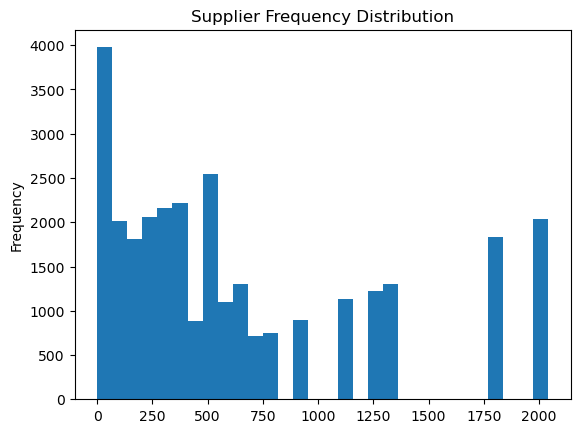

In [19]:
import matplotlib.pyplot as plt
df_categorical['SUPPLIER_FREQUENCY'].plot(kind='hist', bins=30)
plt.title('Supplier Frequency Distribution')
plt.show()


The distribution is positively skewed.Most suppliers have lower frequencies and fewer suppliers have very high frequencies.The distribution is not normally distributed

### Log tranformation to reduce skewness

In [20]:
df_categorical['SUPPLIER_FREQUENCY_LOG'] = np.log1p(df_categorical['SUPPLIER_FREQUENCY'])


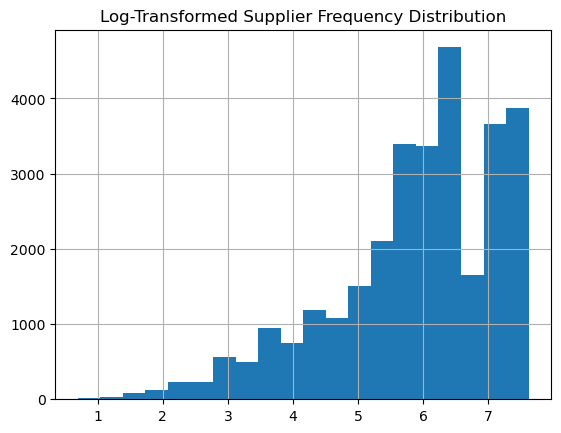

In [21]:
df_categorical['SUPPLIER_FREQUENCY_LOG'].hist(bins=20)
plt.title('Log-Transformed Supplier Frequency Distribution')
plt.show()


In [22]:
df_categorical['SUPPLIER_FREQUENCY_LOG'].describe()

count    29967.000000
mean         5.887441
std          1.307414
min          0.693147
25%          5.241747
50%          6.089045
75%          7.031741
max          7.621685
Name: SUPPLIER_FREQUENCY_LOG, dtype: float64

the log tranformation has normalized the supplier frequency data,making it more appropriate for machine learning algorithms and statistical analysis that assume normality on symmetrically distributed data

### EDA for numerical values